In [1]:
import os
print(os.getcwd())
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

/Users/user/Desktop


In [2]:
#anaconda: conda install -c glemaitre imbalanced-learn : USED SKLEARN RESAMPLE MODULE INSTEAD
#DWW used resample from scikit learn instead (see below cell # c. 48)
# from sklearn.utils import resample
# df_minor_upsampled= resample(df_minor,replace= True, n_samples= 7391, random_state= 27 )

#Then try to import library in your file:
#from imblearn.over_sampling import SMOTE

# import imblearn
# from imblearn import over_sampling as os
# from imblearn import pipeline as pl
# from imblearn.metrics import classification_report_imbalanced

# I. Data Wrangling: Number of Visits

In [3]:
df2= pd.read_csv('takehome_user_engagement.csv')
print(df2.shape)
df2.head()
# df2.visited.nunique() # 1 value only, so the sum conveys the number of visits
# df2.user_id.nunique()   # 8823....Hmmm > 2000 missing data?!
# so 207.917 visits from 8823 users , average = 23 visits , median?? much less due to extreme skew, 

(207917, 3)


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
dfg= df2.groupby(df2['user_id'])
total_visits= dfg.visited.sum()
print(len(total_visits))
total_visits  # len 8823 vs 12000 id's !? so for 2177 id's there are no time stamps at all?
# so for example, no record for id's 8,9 12,15,18,32,34,35 etc.

8823


user_id
1          1
2         14
3          1
4          1
5          1
6          1
7          1
10       284
11         1
13         1
14         1
17         1
19         2
20         7
21         1
22         1
23         1
24         1
25         2
27         1
28         1
29         1
30         1
31         1
33        18
36         1
37         1
41         1
42       342
43         8
        ... 
11961     33
11962      1
11963      2
11964    160
11965      8
11967     43
11968      1
11969    131
11974      1
11975    216
11977      1
11979      1
11980      8
11981      4
11982      1
11983      1
11984      1
11986      1
11987      1
11988     30
11989      1
11990      1
11991      5
11992      1
11995      1
11996      1
11997      1
11998      1
11999      1
12000      1
Name: visited, Length: 8823, dtype: int64

In [5]:
total_visits_list= total_visits.tolist()

In [6]:
type(total_visits_list)

list

In [7]:
descending_visits= sorted(total_visits_list, reverse= True)

In [8]:
descending_visits[0:5]

[606, 600, 593, 590, 585]

Text(0.5, 1.0, 'Histogram of Total Visits for the 100 Most Active Users')

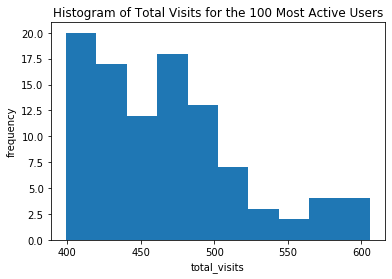

In [9]:
plt.hist(descending_visits[:100], bins= None)
plt.xlabel('total_visits')
plt.ylabel('frequency')
plt.title('Histogram of Total Visits for the 100 Most Active Users')
# plt.show()

(array([7990., 8250., 8416., 8525., 8617., 8697., 8750., 8792., 8814.,
        8823.]),
 array([  1. ,  61.5, 122. , 182.5, 243. , 303.5, 364. , 424.5, 485. ,
        545.5, 606. ]),
 <a list of 10 Patch objects>)

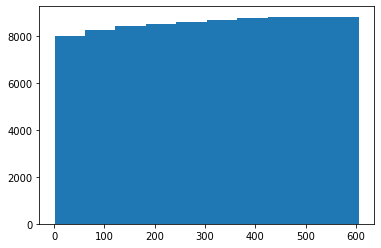

In [10]:
plt.hist(total_visits, cumulative= True)
# we have a business with a relatively small number of highly active users: should the cut-off be 10, not three?
# first bin is to 61.5 !! because of the high skew

In [11]:
df_visits= pd.DataFrame(total_visits)  # 
print(df_visits.head(15))
print(df_visits.shape) #   (8823, 1)
df_visits.tail(10)

         visited
user_id         
1              1
2             14
3              1
4              1
5              1
6              1
7              1
10           284
11             1
13             1
14             1
17             1
19             2
20             7
21             1
(8823, 1)


,visited
user_id,
11989,1
11990,1
11991,5
11992,1
11995,1
11996,1
11997,1
11998,1
11999,1


In [12]:
df_visits.columns

Index(['visited'], dtype='object')

In [13]:
# df_visits['visited'].value_counts() # oddly only partially sorted !!!
# interesting question: 340 people visited twice, but dozens more than 200x !! skewed revenues also?

In [14]:
# FINDING THOSE USERS WHO HAVE EVER VISITED AT LEAST THREE TIMES IN SINGLE WEEK

In [15]:
df2['visit_date']= pd.to_datetime(df2.time_stamp)
print(df2['visit_date'].min(), df2['visit_date'].max()) # So from June 1, 2012 to June 6, 2014 (=two years, one week)

2012-05-31 08:20:06 2014-06-06 14:58:50


In [16]:
df2['week_year_combo']= df2['visit_date'].dt.strftime('%U-%Y')

In [17]:
df2.head()

,time_stamp,user_id,visited,visit_date,week_year_combo
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,16-2014
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,45-2013
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04,47-2013
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04,49-2013
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04,51-2013


In [18]:
#DWW

In [19]:
week_year_freq= df2.groupby(['user_id','week_year_combo']).visited.sum()  #. .max()

In [20]:
week_year_freq
# max_usage= week_year_freq.groupby('user_id', 'week_year_combo.max())
df_week_year_freq= pd.DataFrame(week_year_freq)
df_week_year_freq.head(30)
# type(df_week_year_freq) # df , as it should be!

visited
user_id week_year_combo         
1       16-2014                1
2       01-2014                1
        05-2014                2
        06-2014                2
        07-2014                1
        10-2014                2
        13-2014                1
        45-2013                1
        47-2013                1
        49-2013                1
        51-2013                1
        52-2013                1
3       11-2013                1
4       20-2013                1
5       03-2013                1
6       50-2013                1
7       51-2012                1
10      00-2014                3
        01-2014                5
        02-2013                1
        02-2014                5
        03-2013                1
        03-2014                6
        04-2013                1
        04-2014                6
        05-2013                2
        05-2014                3
        06-2013                1
        06-2014                6
        07-2013                2

In [21]:
condition= (df_week_year_freq.visited > 2)
df_adopted_weeks= df_week_year_freq[condition]
type(df_adopted_weeks) #   df.    .index
df_adopted_weeks.shape # 33804 x 1 (Dual Index)



(33804, 1)

In [22]:
df_adopted_users= df_adopted_weeks.unstack()  # df_adopted_weeks['week_year_combo']
# df_adopted_users.shape # 1432 users, single index
df_adopted_users  # type() is df   .index is what we want to create labels for adopted

visited                                                  \
week_year_combo 00-2014 01-2014 02-2014 03-2014 04-2014 05-2014 06-2014   
user_id                                                                   
10                  3.0     5.0     5.0     6.0     6.0     3.0     6.0   
20                  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
42                  NaN     5.0     6.0     3.0     4.0     3.0     5.0   
43                  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
50                  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
53                  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
63                  4.0     7.0     7.0     7.0     7.0     7.0     7.0   
69                  4.0     6.0     7.0     7.0     7.0     6.0     4.0   
74                  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
81                  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
82                  3.0     NaN     5.0     4.0     4.0     NaN     3.0   
87                  3.0     4.0     5.0     NaN     4.0     4.0     5.0   
133                 NaN     NaN     NaN     NaN     4.0     NaN     3.0   
135                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
141                 NaN     3.0     NaN     NaN     NaN     NaN     NaN   
146                 NaN     NaN     NaN     3.0     NaN     NaN     3.0   
153                 4.0     4.0     5.0     3.0     5.0     4.0     4.0   
160                 NaN     6.0     NaN     3.0     5.0     4.0     5.0   
165                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
168                 4.0     7.0     6.0     7.0     6.0     6.0     5.0   
174                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
185                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
188                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
197                 NaN     6.0     3.0     4.0     3.0     5.0     NaN   
200                 NaN     4.0     4.0     4.0     3.0     5.0     6.0   
202                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
203                 4.0     6.0     5.0     7.0     7.0     6.0     7.0   
209                 NaN     6.0     5.0     4.0     NaN     NaN     4.0   
214                 NaN     NaN     NaN     NaN     3.0     3.0     NaN   
230                 4.0     7.0     7.0     7.0     7.0     7.0     7.0   
...                 ...     ...     ...     ...     ...     ...     ...   
11758               NaN     3.0     NaN     NaN     NaN     NaN     NaN   
11762               NaN     5.0     4.0     6.0     4.0     NaN     4.0   
11769               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
11796               NaN     NaN     NaN     4.0     NaN     NaN     NaN   
11801               3.0     5.0     6.0     3.0     3.0     3.0     4.0   
11805               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
11806               NaN     3.0     NaN     3.0     NaN     NaN     3.0   
11823               NaN     NaN     NaN     3.0     NaN     NaN     NaN   
11836               NaN     NaN     NaN     NaN     3.0     4.0     NaN   
11841               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
11857               NaN     3.0     NaN     4.0     3.0     NaN     5.0   
11869               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
11873               3.0     4.0     5.0     7.0     4.0     NaN     5.0   
11885               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
11895               NaN     4.0     3.0     4.0     4.0     NaN     NaN   
11909               3.0     3.0     6.0     NaN     5.0     3.0     6.0   
11913               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
11920               NaN     6.0     NaN     5.0     NaN     NaN     4.0   
11924               NaN     NaN     3.0     NaN     3.0     NaN     NaN   
11939               NaN     NaN     NaN  

In [29]:
df_adopted_users= pd.DataFrame(df_adopted_users)
df_adopted_users.shape  
# 1432, 105 : so out of 8823 users w time stamps, 1432 visited three times in a single week: this is 16.2% (84% majority)


(1432, 105)

In [30]:
adopted_var= df_adopted_users.index.tolist() # Use this list w Python 'in' to create labels for adopted: no df merge!

In [31]:
adopted_var[0:10]  # this is a list of the adopted users STOP HERE?

[10, 20, 42, 43, 50, 53, 63, 69, 74, 81]

# II. Data Wrangling: Features Data Set

In [32]:
df= pd.read_csv('takehome_users.csv', encoding='cp1252')
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 11: invalid continuation byte
# After two hours, eventually, added:   encoding='cp1252'
# or:  encoding= 'latin1'
print(df.shape)
df.info()  # It seems the 8823 corresponds to the time stamps collectively: matches the prior 8823 exactly!
df.head()

(12000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [33]:
df = df[pd.notnull(df['last_session_creation_time'])]
df.shape #8823 (dropped the users with no time stamps)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     8823 non-null int64
creation_time                 8823 non-null object
name                          8823 non-null object
email                         8823 non-null object
creation_source               8823 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      8823 non-null int64
enabled_for_marketing_drip    8823 non-null int64
org_id                        8823 non-null int64
invited_by_user_id            4776 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 758.2+ KB


In [34]:
df['name'].nunique()                 # 8453   These are not consistent?? sometimes missing?
#df['object_id'].nunique()            # 8823
#df['email'].nunique()                # 8810 ....
# df['org_id'].nunique()              # 417 different org's
df['invited_by_user_id'].nunique()   # 2229 different users made 4776 total invitations vs 1432 'adopted'

2229

In [35]:
df.creation_source.value_counts() # Form of channel marketing?? # ORG_INVITE is the most common

ORG_INVITE            3188
SIGNUP                1898
GUEST_INVITE          1588
SIGNUP_GOOGLE_AUTH    1385
PERSONAL_PROJECTS      764
Name: creation_source, dtype: int64

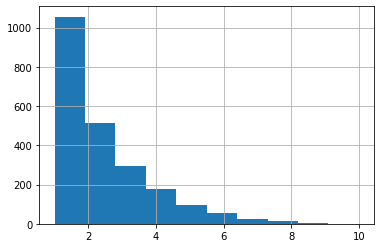

In [36]:
df.invited_by_user_id.value_counts().hist() # when an inviation was made by a user, usually a user extended < 2 invitations

In [37]:
df['creation_time']= pd.to_datetime(df['creation_time'])

In [38]:
# convert last_time to datetime: UNIX stamp in seconds vs 1970
df['last_session_creation_time'] = pd.to_datetime(df['last_session_creation_time'],unit='s')
df['time_span']= df.last_session_creation_time - df.creation_time
# df['time_span']   duration.total_days() 
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_span
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0 days
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,136 days
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0 days
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1 days
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5 days


# invited_by_user_id

In [39]:
df.invited_by_user_id= df.invited_by_user_id.fillna(value= '777')
df['invited_by_user_id'][0:20]

0     10803
1       316
2      1525
3      5151
4      5240
5     11241
6       777
9      4143
10      777
12    11204
13      777
16     1600
18      777
19      777
20      777
21     2994
22       23
23      777
24     6312
26     4189
Name: invited_by_user_id, dtype: object

In [40]:
df['invited_by_user_id']= df['invited_by_user_id'].astype('int')
#df['invited_by_user_id'][0:20]
# df.info() #  invited_id: 4776 non-null category

df['invited_by_user_id']= df['invited_by_user_id'].astype('category')
df['invited_by_user_id'][0:10]

0     10803
1       316
2      1525
3      5151
4      5240
5     11241
6       777
9      4143
10      777
12    11204
Name: invited_by_user_id, dtype: category
Categories (2230, int64): [3, 7, 10, 23, ..., 11986, 11994, 11997, 11999]

In [41]:
df['invited_by_user_id'].value_counts().median()# 2.0 so 4000 of the 8823 invited by 2 or less (and > 1,000 but just one)

2.0

In [42]:
df['invited_by_user_id'].value_counts()
dfc= pd.DataFrame(df['invited_by_user_id'].value_counts())
print(dfc.shape) #2230,1
#dfc.head()
# dfc.tail(1000) # more than 1,000 invited by just a single person!!

(2230, 1)


In [43]:
df.rename(columns={'opted_in_to_mailing_list':'mail_list','last_session_creation_time': 'last_time',
                   'enabled_for_marketing_drip':'mkt_drip','invited_by_user_id':'invited_id'},inplace= True)
df.head()

,object_id,creation_time,name,email,creation_source,last_time,mail_list,mkt_drip,org_id,invited_id,time_span
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,0 days
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,136 days
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,0 days
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,1 days
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,5 days


In [44]:
df= df.drop(['creation_time','name','email','last_time','time_span'], axis= 1)

In [45]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 11999
Data columns (total 6 columns):
object_id          8823 non-null int64
creation_source    8823 non-null object
mail_list          8823 non-null int64
mkt_drip           8823 non-null int64
org_id             8823 non-null int64
invited_id         8823 non-null category
dtypes: category(1), int64(4), object(1)
memory usage: 528.2+ KB


,object_id,creation_source,mail_list,mkt_drip,org_id,invited_id
0,1,GUEST_INVITE,1,0,11,10803
1,2,ORG_INVITE,0,0,1,316
2,3,ORG_INVITE,0,0,94,1525
3,4,GUEST_INVITE,0,0,1,5151
4,5,GUEST_INVITE,0,0,193,5240


In [46]:
df['invited_id'][0:20]

0     10803
1       316
2      1525
3      5151
4      5240
5     11241
6       777
9      4143
10      777
12    11204
13      777
16     1600
18      777
19      777
20      777
21     2994
22       23
23      777
24     6312
26     4189
Name: invited_id, dtype: category
Categories (2230, int64): [3, 7, 10, 23, ..., 11986, 11994, 11997, 11999]

In [47]:
df['invited_cat']= [1 if x == 777 else 0 for x in df['invited_id']] # creating labels:  == NaN
df['invited_cat'][0:20]

0     0
1     0
2     0
3     0
4     0
5     0
6     1
9     0
10    1
12    0
13    1
16    0
18    1
19    1
20    1
21    0
22    0
23    1
24    0
26    0
Name: invited_cat, dtype: int64

In [48]:
# No merge, just reference list of adopted users
# list of adopted users is: adopted_var
df['adopted']= [1 if x in adopted_var else 0 for x in df['object_id']] # creating labels
len(df.adopted) #8823  OK
sum(df.adopted)  # 1432  OK
df.head(10)

,object_id,creation_source,mail_list,mkt_drip,org_id,invited_id,invited_cat,adopted
0,1,GUEST_INVITE,1,0,11,10803,0,0
1,2,ORG_INVITE,0,0,1,316,0,0
2,3,ORG_INVITE,0,0,94,1525,0,0
3,4,GUEST_INVITE,0,0,1,5151,0,0
4,5,GUEST_INVITE,0,0,193,5240,0,0
5,6,GUEST_INVITE,0,0,197,11241,0,0
6,7,SIGNUP,0,1,37,777,1,0
9,10,ORG_INVITE,1,1,318,4143,0,1
10,11,SIGNUP,0,0,69,777,1,0
12,13,ORG_INVITE,0,0,254,11204,0,0


In [49]:
# DataFrame.reset_index(level=None, drop=False, inplace=False
df.set_index('object_id', drop= True, inplace= True)

In [50]:
# Using pandas’ get_dummies
# Process our training data:  First we define the list of categorical features that we will want to process:
cat_columns = ['creation_source', 'mail_list','mkt_drip','org_id','invited_cat']
# We can build dummy features with pandas by calling the get_dummies function. 
# df_processed = pd.get_dummies(df, prefix_sep="__", columns=cat_columns)
df_wdummies= pd.get_dummies(df, columns= cat_columns)
df_wdummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Columns: 430 entries, invited_id to invited_cat_1
dtypes: category(1), int64(1), uint8(428)
memory usage: 3.8 MB


In [51]:
df5= df_wdummies.copy()
df5.adopted.value_counts()

0    7391
1    1432
Name: adopted, dtype: int64

In [52]:
df_major= df5[df5.adopted == 0]
df_minor= df5[df5.adopted == 1]
print(df_major.shape, df_minor.shape)

(7391, 430) (1432, 430)


In [53]:
from sklearn.utils import resample
df_minor_upsampled= resample(df_minor,replace= True, n_samples= 7391, random_state= 27 )
df_minor_upsampled.shape

(7391, 430)

In [54]:
df6= pd.concat([df_major, df_minor_upsampled], axis= 0,join= 'inner', ignore_index= True)
df6.shape

(14782, 430)

In [55]:
df6.info()
df6.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14782 entries, 0 to 14781
Columns: 430 entries, invited_id to invited_cat_1
dtypes: category(1), int64(1), uint8(428)
memory usage: 6.3 MB


,invited_id,adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,mail_list_0,mail_list_1,mkt_drip_0,...,org_id_409,org_id_410,org_id_411,org_id_412,org_id_413,org_id_414,org_id_415,org_id_416,invited_cat_0,invited_cat_1
0,10803,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
1,316,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1525,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,5151,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,5240,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [56]:
# Classification
from sklearn.tree import DecisionTreeClassifier         # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split    # Import train_test_split function
from sklearn import metrics                             # Import scikit-learn metrics module for accuracy calculation


# feature_cols = ['creation_source','mail_list','mkt_drip','org_id','invited_id']
# list(df_wdummies.columns.values)

X = df6.drop('adopted', axis=1)         # Features
y = df6['adopted']                      # Target variable 

feature_cols= list(X.columns.values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [57]:
# Create Decision Tree classifer object
dtree = DecisionTreeClassifier(random_state=3, criterion='entropy',splitter='best', max_depth= 5,
                                 min_samples_split=2)     

dtree = dtree.fit(X_train,y_train)          # Train Decision Tree Classifer

y_train_pred= dtree.predict(X_train)
y_pred = dtree.predict(X_test)            # Predict the response for test dataset

# Model Accuracy, how often is the classifier correct?
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("Test Accuracy:",  metrics.accuracy_score(y_test, y_pred)) #This is for the Test Set: Tree diagram is for the Train Set
# NB 

Train Accuracy: 0.5288489417222383
Test Accuracy: 0.5343855693348365


In [58]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

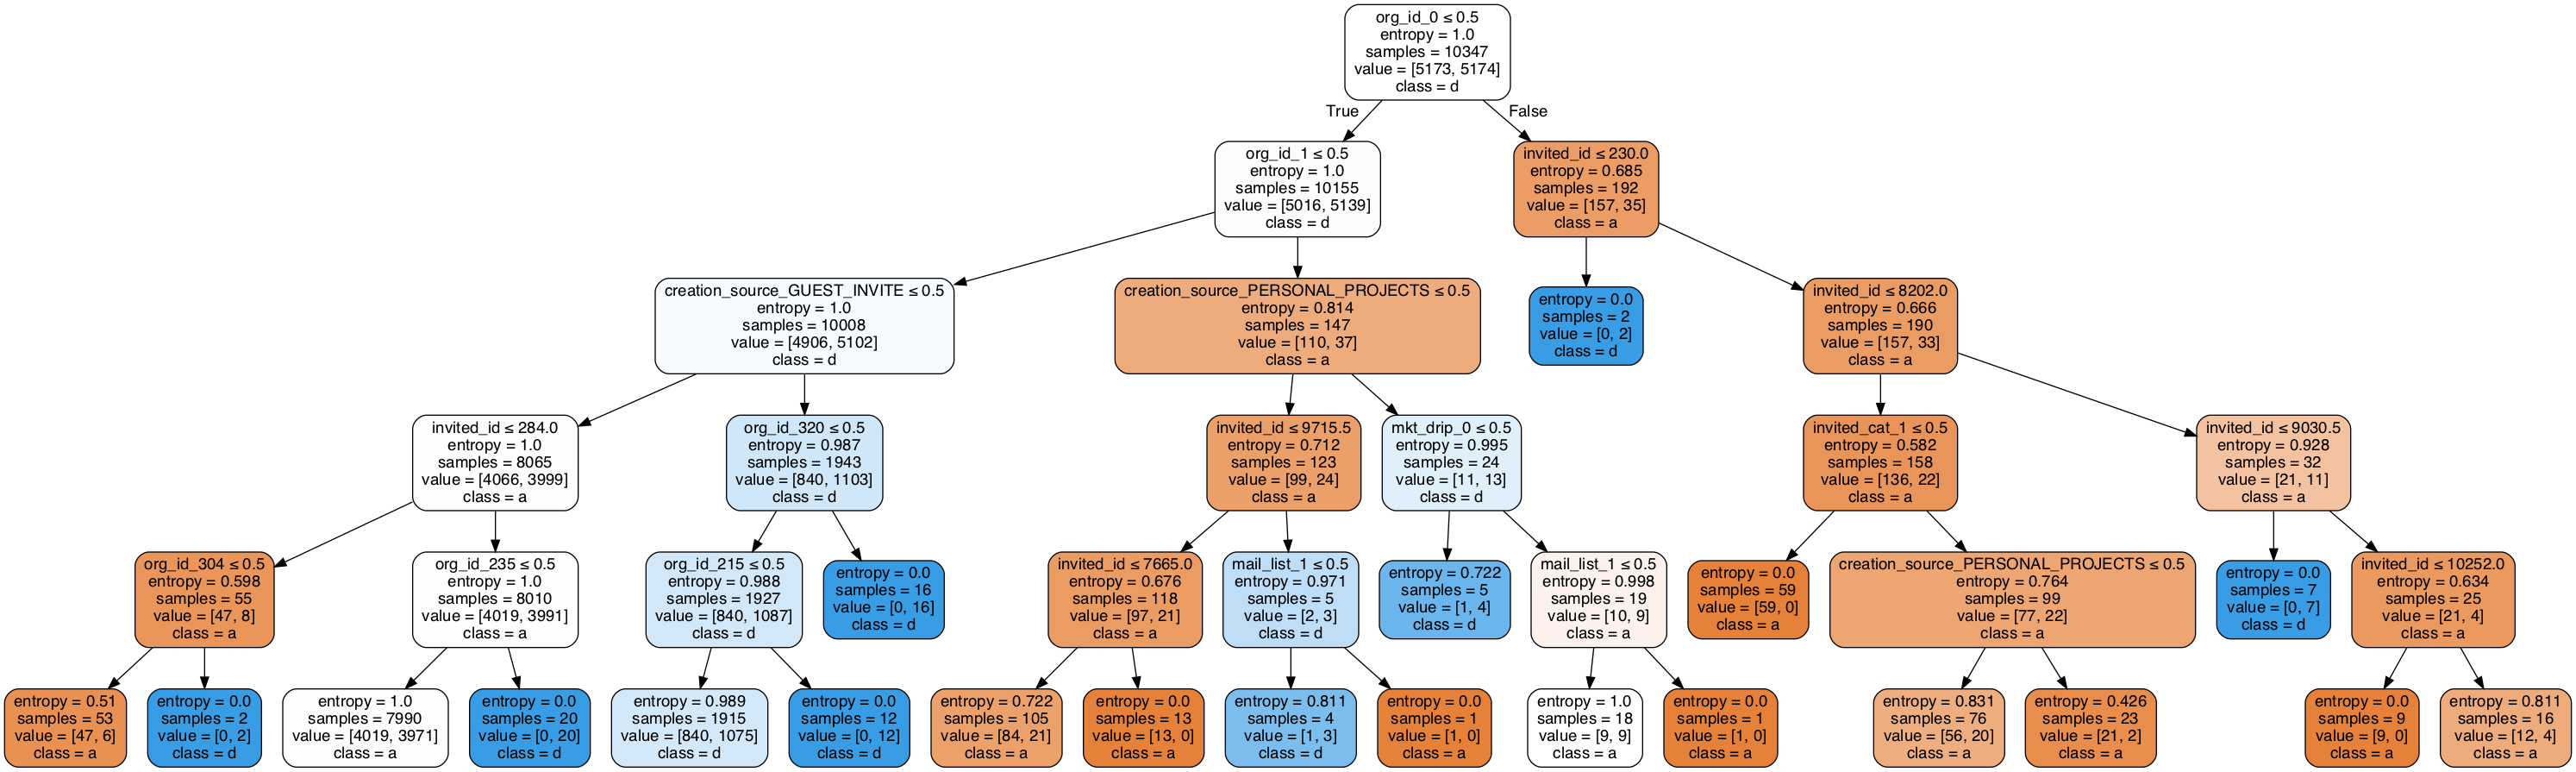

In [59]:
# Add graphics to understand which variables selected for Tree and parameter breaks!
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, special_characters=True,filled=True, rounded=True,
                        feature_names= feature_cols,  
                        class_names= 'adopted')
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

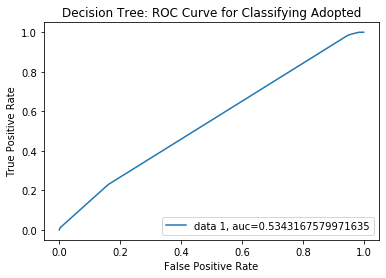

In [60]:
import numpy as np
# yp_pred # shows labels, not probabilities! how do we show probabilities?
probs = dtree.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
probs.round(decimals= 2)

fpr_p, tpr_p, prob_p = metrics.roc_curve(y_test, probs)   # Third argument should be probs, not Labels!!! Sarkar
auc = metrics.roc_auc_score(y_test, y_pred)               # But we get the same kinked curve as probs = 1.0 or 0.0
plt.plot(fpr_p,tpr_p,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Decision Tree: ROC Curve for Classifying Adopted")
plt.show()
# with an AUC of just 0.5, this model appears to have negligible predictive power
# May want to go back and use the groups individually (up to at least 20??)

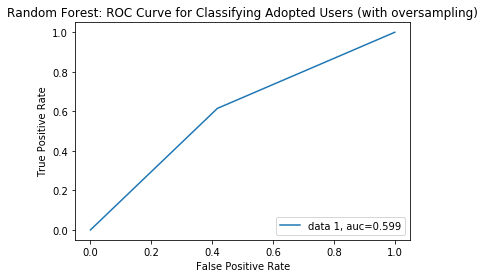

In [61]:
# Random Forest Classifier

# Try a RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

# Limit max depth
forest = RandomForestClassifier(max_depth = 7, n_estimators=200)

forest.fit(X_train,y_train)             # Train
y_pred_F = forest.predict(X_test)      # Predict the response for test dataset

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_F)        # Third argument should be probs, not Labels!!! Sarkar
auc = metrics.roc_auc_score(y_test, y_pred_F)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc.round(3)))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Random Forest: ROC Curve for Classifying Adopted Users (with oversampling)")
plt.show()

In [62]:
# REPEAT W EACH USER AS AN INVITE SOURCE ...Columns: 2659 entries BUT STILL AUC= 0.5 ONLY !!!

In [63]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
actual = y_test 
predicted = y_pred_F
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix :')    # top row: TP  FN  : Bottom Row FP   TN
print(results) 
print('Accuracy Score :',accuracy_score(actual, predicted))
print('Report : ')
print(classification_report(actual, predicted)) 

# Recall is horizontal on BOTH rows: TP/(TP + FN): DWW TP/Actual: How much did we find the target 
# Precision is vertical : 
# f1-score is the geometric mean/average for Precision and Recall

Confusion Matrix :
[[1293  925]
 [ 854 1363]]
Accuracy Score : 0.5988726042841037
Report : 
              precision    recall  f1-score   support

           0       0.60      0.58      0.59      2218
           1       0.60      0.61      0.61      2217

   micro avg       0.60      0.60      0.60      4435
   macro avg       0.60      0.60      0.60      4435
weighted avg       0.60      0.60      0.60      4435



In [64]:
# Create Decision Tree classifer object
dtree = DecisionTreeClassifier(random_state=3, criterion='entropy',splitter='best', max_depth= 5,
                                 min_samples_split=2)     

dtree = dtree.fit(X_train,y_train)          # Train Decision Tree Classifer

y_pred_T = dtree.predict(X_test)            # Predict the response for test dataset

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_T))

Accuracy: 0.5343855693348365


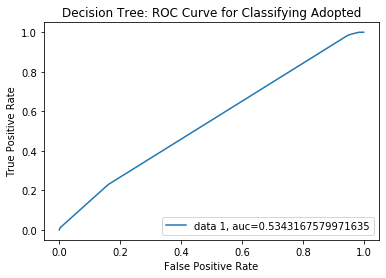

In [65]:
import numpy as np
# yp_pred # shows labels, not probabilities! how do we show probabilities?
probs = dtree.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
probs.round(decimals= 2)

fpr_D, tpr_D, prob_D = metrics.roc_curve(y_test, probs)   # Third argument should be probs, not Labels!!! Sarkar
auc = metrics.roc_auc_score(y_test, y_pred_T)               # But we get the same kinked curve as probs = 1.0 or 0.0
plt.plot(fpr_D,tpr_D,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Decision Tree: ROC Curve for Classifying Adopted")
plt.show()

In [70]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(y_test, y_pred_T) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, y_pred_T))
print('Report : ')
print(classification_report(y_test, y_pred_T))


Confusion Matrix :
[[1862  356]
 [1709  508]]
Accuracy Score : 0.5343855693348365
Report : 
              precision    recall  f1-score   support

           0       0.52      0.84      0.64      2218
           1       0.59      0.23      0.33      2217

   micro avg       0.53      0.53      0.53      4435
   macro avg       0.55      0.53      0.49      4435
weighted avg       0.55      0.53      0.49      4435



In [ ]:
# Highgrading Approach: identify cases which have the highest probability

In [ ]:
def predict_with_threshold(model, X, threshold=0.5):
    probabilities = model.predict_proba(X)[:, 1]
    predictions = np.where(probabilities >= threshold, 1, 0)
    return predictions

In [ ]:
predict_with_threshold(dtree, X, threshold=0.5)[0:50]


In [ ]:
very_confident= predict_with_threshold(dtree, X, threshold=0.9)
print(sum(very_confident))
# of the 1342 predicted 'adopted', 86 were assigned a probability of 0.9 or more

In [ ]:
# DWW Apply the array to user ID to find best targets: but be careful of wrong index after resample reset:
# DWW: Don't oversample, but rather sample equally several times (like cross validation w same stratified samples)
8823/1432: so create SIX stratified samples, then use an ensemble of the six trees so derived!!!??
# If have six arrays liike above, take the mean, then sort/rank-order them: 
# these are target prospects for EV ownership

# np.array_split(df,n)   #Docstring: Split an array into multiple sub-arrays. BUT NOT STRATIFIED!!! EG TIME BIAS

Please refer to the ``split`` documentation.  The only difference between these functions is that ``array_split`` 
allows `indices_or_sections` to be an integer that does *not* equally divide the axis.

# CODE USED IN PRIOR NOTEBOOKS BUT NOT HERE 
# PROVIDED BELOW PURELY FOR REFERENCE (EG SPARSE ...)

In [ ]:
X2 = df2_wdummies.drop('adopted', axis=1)         # Features
y2 = df2_wdummies['adopted']                      # Target variable 

feature_cols= list(X2.columns.values)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
dtree2 = DecisionTreeClassifier(random_state=3, criterion='entropy',splitter='best', max_depth= 5,
                                 min_samples_split=2)     

dtree2 = dtree.fit(X2_train,y2_train)          # Train Decision Tree Classifer

y2_pred = dtree.predict(X2_test)            # Predict the response for test dataset

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))

In [ ]:
probs2 = dtree2.predict_proba(X2_test)
# keep probabilities for the positive outcome only
probs2 = probs2[:, 1]
probs2.round(decimals= 2)

fpr_2, tpr_2, probs2 = metrics.roc_curve(y2_test, probs2)   # Third argument should be probs, not Labels!!! Sarkar
auc = metrics.roc_auc_score(y2_test, y2_pred)               # But we get the same kinked curve as probs = 1.0 or 0.0
plt.plot(fpr_2,tpr_2,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Decision Tree: ROC Curve for Classifying Adopted w all users sourced")
plt.show()

# TAKE THREE: AVOID SPARSE PROBLEMS with JUST THREE VARIABLES !?

In [ ]:
cat_columns_3 = ['creation_source', 'mail_list','mkt_drip']
# We can build dummy features with pandas by calling the get_dummies function. 
# df_processed = pd.get_dummies(df, prefix_sep="__", columns=cat_columns)
df3_wdummies= pd.get_dummies(df, columns= cat_columns_3)
df3_wdummies.info()

In [ ]:
X3 = df3_wdummies.drop(['adopted','org_id','invited_id',"invited_cat"], axis=1)         # Features
y3 = df3_wdummies['adopted']                      # Target variable 

feature_cols= list(X3.columns.values)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
dtree3 = DecisionTreeClassifier(random_state=3, criterion='entropy',splitter='best', max_depth= 5,
                                 min_samples_split=2)     

dtree3 = dtree.fit(X3_train,y3_train)          # Train Decision Tree Classifer

y3_pred = dtree.predict(X3_test)            # Predict the response for test dataset

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y3_test, y3_pred).round(3))

In [ ]:
probs3 = dtree3.predict_proba(X3_test)
# keep probabilities for the positive outcome only
probs3 = probs3[:, 1]
probs3.round(decimals= 2)

fpr_3, tpr_3, probs3 = metrics.roc_curve(y3_test, probs3)   # Third argument should be probs, not Labels!!! Sarkar
auc = metrics.roc_auc_score(y3_test, y3_pred)               # But we get the same kinked curve as probs = 1.0 or 0.0
plt.plot(fpr_3,tpr_3,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Decision Tree: ROC Curve for Classifying Adopted w all users Separately Identified")
plt.show()

In [ ]:
# X_train = df_upsampled.drop('adopted_user', axis=1)
# y_train = df_upsampled['adopted_user']

In [ ]:
# Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier         # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split    # Import train_test_split function
from sklearn import metrics                             # Import scikit-learn metrics module for accuracy calculation


# feature_cols = ['creation_source','mail_list','mkt_drip','org_id','invited_id']
list(df_wdummies.columns.values)

X = df_wdummies.drop('adopted', axis=1)         # Features
y = df_wdummies['adopted']                      # Target variable 

feature_cols= list(X.columns.values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Decision Tree: org_ID converted to Bool "eleven_orgs" (largest 11 only)

In [ ]:
# Create Decision Tree classifer object
dtree = DecisionTreeClassifier(random_state=3, criterion='entropy',splitter='best', max_depth= 2,
                                 min_samples_split=2)     

dtree = dtree.fit(X_train,y_train)          # Train Decision Tree Classifer

y_pred = dtree.predict(X_test)            # Predict the response for test dataset

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #This is for the Test Set: Tree diagram is for the Train Set
# NB accuracy w just 2 levels almost identical to with 5, so just 2 used to make Tree Diagram more intuitive/visible
# NB accuracy of 0.75, but data is imbalanced: only 23% adopted, so 77% accuracy by predicting not adopted always!

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:

# Add graphics to understand which variables selected for Tree and parameter breaks!
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, special_characters=True,filled=True, rounded=True,
                        feature_names= feature_cols,  
                        class_names= 'adopted')
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
import numpy as np
# yp_pred # shows labels, not probabilities! how do we show probabilities?
probs = dtree.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
probs.round(decimals= 2)

fpr_p, tpr_p, prob_p = metrics.roc_curve(y_test, probs)   # Third argument should be probs, not Labels!!! Sarkar
auc = metrics.roc_auc_score(y_test, y_pred)               # But we get the same kinked curve as probs = 1.0 or 0.0
plt.plot(fpr_p,tpr_p,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Decision Tree: ROC Curve for Classifying Adopted")
plt.show()
# with an AUC of just 0.5, this model appears to have negligible predictive power
# Mat want to go back and use the groups individually (up to at least 20??)

In [ ]:
# Random Forest Classifier

# Try a RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

# Limit max depth
forest = RandomForestClassifier(max_depth = 4, n_estimators=10)

forest.fit(X_train,y_train)             # Train
y_pred_F = forest.predict(X_test)      # Predict the response for test dataset

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_F)        # Third argument should be probs, not Labels!!! Sarkar
auc = metrics.roc_auc_score(y_test, y_pred_F)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Random Forest: ROC Curve for Classifying PHEV's vs. Non-EV's")
plt.show()

In [ ]:
# Once again, the AUC is just 0.5, indicating the Random Forest classifier model has negligible redictive power

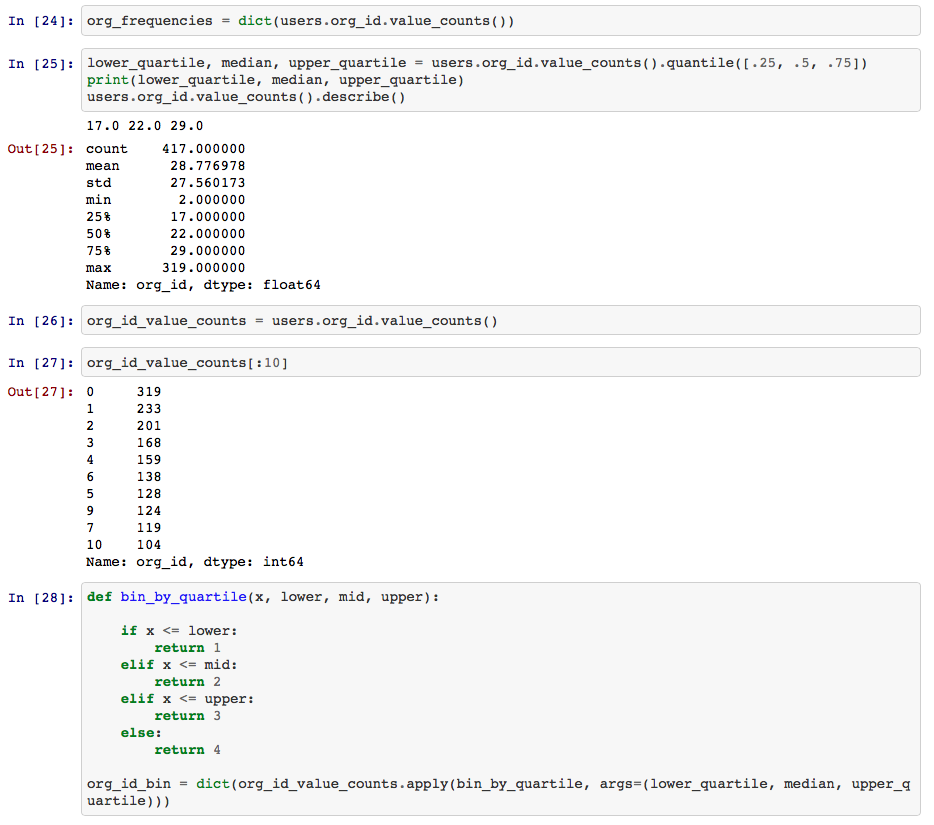

In [ ]:
# Redundant Code

In [ ]:
# df.resample('D').mean()
weekly= dfg.visited.sum().resample('W')
# TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'CategoricalIndex'
weekly

In [ ]:
# weekly.info()
weekly

In [ ]:
df_weekly= pd.DataFrame(weekly, index= [df.weekly['user_id', df_weekly['datetime']]])

In [ ]:
df_weekly.info()
df_weekly.shape   # (82282, 1)
df_weekly.head(10)

In [ ]:
df_weekly.visited.sum() # .resample('W')  AttributeError: 'numpy.float64' object has no attribute 'resample'

In [ ]:
df_adopted_users.head()

# REDUNDANT BELOW

# drop all columns except:  df = df[['a','b']]   or    df = df.loc[:, ['a','b']]
# df_adopted_users= df_adopted_users[['00-2014','01-2014']]  # , axis= 1
# df_adopted_users= df_adopted_users.loc(['00-2014','01-2014'])

# df.drop(df.columns.difference(['a','b']), 1, inplace=True)

df_adopted_users.columns

df_adopted_users.drop(df_adopted_users.columns.difference(['00-2014','01-2014']), 1, inplace=True)

df_adopted_users.shape

df_adopted_users.reset_index(inplace= True)   # wrong header, but this is in fact a range index!!! Good! 

df_adopted_users.info()
df_adopted_users.head()

list_for_labels= df_adopted_users['user_id'].tolist()

df_visits['adopted']= [1 if x in list_for_labels else 0 for x in df_visits.visited] # creating labels - see cell 

df_visits.head(10)

df_visits['adopted'].sum()  # 179 WRONG !!!

# OLD APPROACH

##. df_visits['adopted']= [1 if x > 2 else 0 for x in df_visits.visited] # creating labels

print(df_visits.adopted.sum())  # 2007
print(8823- (6235 + 340))
df_visits.head() # of the 12,000 purported users, we have timestamps for just 8823, and 2248 have visited 3x or more
# NB Imbalanced dataset: 2007 adopted out of 8823: so 77% accuracy by just predicting "Not Adopted" always

df_visits.reset_index(inplace= True) # preparing for inner join (common only)
df_visits.head()

df_visits= df_visits.drop(['visited'], axis= 1)

df_visits.user_id= df_visits.user_id.astype('category')
df_visits.info()

In [ ]:
df['object_id']= df['object_id'].astype('category')             # make it the index??
df['creation_source']= df['creation_source'].astype('category')  # still necessary if use one hot encoding?
df['org_id']= df['org_id'].astype('category')                    # same

# df['opted_in_to_mailing_list']= df['opted_in_to_mailing_list'].astype('bool')  # drop, as keep numerical
# df['enabled_for_marketing_drip']= df['enabled_for_marketing_drip'].astype('bool')
# 'last_session_creation_time'
df= df.drop(['name','email'], axis= 1)
df.info()

# last session creation time  missing 3200?
# invited by user_id missing 5600?


# duration = now - then                         # For build-in functions
# duration_in_s = duration.total_seconds()      # Total number of seconds between dates
# Duration in years

# years = divmod(duration_in_s, 31556926)[0]    # Seconds in a year=31556926.
# Duration in days

# days  = duration.days                         # Build-in datetime function
#days  = divmod(duration_in_s, 86400)[0]       # Seconds in a day = 86400

df['time_span']= df.last_time - df.creation_time
df['time_span'][0]
df.head()
# Hmmm....last_time seems more recent than the time stamps, as they indicated only a single visit !!

df= df.drop(['creation_time','last_time','time_span'], axis= 1)
df.head(3)

df.info()

#df.invited_id= df.invited_id.astype('int')
# df.invited_id[0:5]
df.info()

# Combine the Information to create a Labelled set

df_combined= pd.merge(df_adopted_users,df,how= 'inner', left_on= 'user_id', right_on= 'object_id')  # Need a Left Join!?

df_combined.info()
df_combined.head(10)

print(df_combined['org_id'].nunique())
# still 417 different orgs for the 8823 w timestamps: unchanged despite losing 3,200 user_id's !!??
# Something going on here!! Improbable! How related to Creation_source/ ORG_INVITE ??
df_combined['org_id'][0:50]
df_combined['org_id'].value_counts()
# The first eleven orgs are the largest
eleven_orgs_sum= 228+172+150+125+122+102+91+88+87+68+67  # were orgs numbered chronologically?
eleven_orgs_sum #1300 of the 8823 (so about 1/7th)
df_combined['org_id'].value_counts()

# Invited by User Variable

first_eleven= list(range(11))
# data["Team"].isin(["Engineering", "Distribution", "Finance" ]) 
df_combined['eleven_orgs']= df_combined['org_id'].isin(first_eleven)
df_combined[0:20]

df_combined= df_combined.drop(['visited','object_id','org_id','invited_id'], axis= 1)
df_combined.head()

df_combined.set_index('user_id',inplace= True)
df_combined.head(3)

# Using pandas’ get_dummies
# Process our training data:  First we define the list of categorical features that we will want to process:
cat_columns = ['creation_source', 'mail_list','mkt_drip','invited','eleven_orgs']
# We can build dummy features with pandas by calling the get_dummies function. 
# df_processed = pd.get_dummies(df, prefix_sep="__", columns=cat_columns)
df_wdummies= pd.get_dummies(df_combined, columns= cat_columns)
df_wdummies.info()

# list(df.columns.values)
list(df_wdummies.columns.values)

# One Hot Encoding
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
# x[:, 0] = labelencoder.fit_transform(x[:, 0]) # to encode just the first column

# from sklearn.preprocessing import OneHotEncoder
# onehotencoder = OneHotEncoder(categorical_features = [0])
#   x = onehotencoder.fit_transform(x).toarray()

df_wdummies.shape

In [ ]:
df2= pd.read_csv('takehome_user_engagement.csv')

df2.head()
df2.info() # range index time_stamp is a string (not DateTime), and so are user_id (categorical) & visited (Bool)
df2.tail()
# time stamp data : R Chicago Crime example!!

# who has logged into the product on three seperate days in at least one seven-day period?
df2['datetime'] = pd.to_datetime(df2['time_stamp'])  
# Should index be changed, as no time series?
# Better for User ID to be made the Index?
df2 = df2.set_index('datetime')
df2.drop(['time_stamp'], axis=1, inplace=True)
df2['user_id']= df2['user_id'].astype('category')
df2['visited']= df2.visited.astype('bool')
df2.info() 
df2.head()

df2.user_id.unique()  # 8823 distinct usersS

![image.png](attachment:image.png)

In [ ]:
![image.png](attachment:image.png)